# UCI-SECOM : Logistic Regression Code - 2
📌 목적 : 데이터 전처리, 스케일링, 교차 검증, 평가는 동일한 방식으로 진행하고 모델링에 따라 어떠한 차이점이 있는지 확인

📍 Logistic Rregression Code1에서 추가 설명과 일부 코드가 수정된 버전 📍

### 데이터 분석 과정
- 데이터 전처리 : Null 값이 900개 넘는 칼럼 삭제하고 남는 NaN값은 0으로 대체
- 스케일링: StandardScaler, PCA
- 모델링 : Logistic Regression
- 교차 검증 : cross_val_score
- 평가 : confusion matrix, accuracy score, recall score, F1_score, RMSE

## 1. 라이브러리 import

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")  #파이썬 경고 억제

## 2. 데이터 로딩

In [79]:
dataset = pd.read_csv("uci-secom.csv")

In [80]:
dataset.head()  #데이터 확인

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [81]:
dataset.isnull().any().any()  #Null 값 존재 여부 확인

True

## 3. 결측값 처리
- 결측값의 수 합산
- 새로운 j 배열에 결측값의 수가 900개가 넘는 경우 저장
- dataset에서 j column 삭제
- 나머지 column의 결측값은 0으로 대체

### 3.1 Null값 수 합산

In [82]:
d = dataset.isnull().sum()

### 3.2 Null 값이 900개가 넘는 경우 j 배열에 저장

In [83]:
j = []

In [84]:
for i in d.keys():
    if(d[i]>900):
        print(i,d[i])
        j.append(i)

85 1341
109 1018
110 1018
111 1018
157 1429
158 1429
220 1341
244 1018
245 1018
246 1018
292 1429
293 1429
358 1341
382 1018
383 1018
384 1018
492 1341
516 1018
517 1018
518 1018
578 949
579 949
580 949
581 949


### 3.3 j 칼럼 삭제

In [85]:
dataset.drop(j, axis=1, inplace=True)
dataset.head()

,Time,0,1,2,3,4,5,6,7,8,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


### 3.4 나머지 칼럼의 결측값은 0으로 대체

In [86]:
dataset.replace(np.nan, 0, inplace=True)
dataset.head()

,Time,0,1,2,3,4,5,6,7,8,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [87]:
dataset.isnull().any().any()  #Null 값 존재 여부 확인

False

## 4. 데이터 분리

### 4.1 Pass/Fail 칼럼 분리

In [88]:
X = dataset.drop(['Pass/Fail','Time'],axis=1)  #Time과 Pass/Fail 칼럼 삭제한 값 X에 저장
y = dataset['Pass/Fail']  #Pass/Fail 칼럼만 y에 저장

print("shape of x:", X.shape)
print("shape of y:", y.shape)

shape of x: (1567, 566)
shape of y: (1567,)


In [89]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,576,577,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,1.6765,14.9509,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


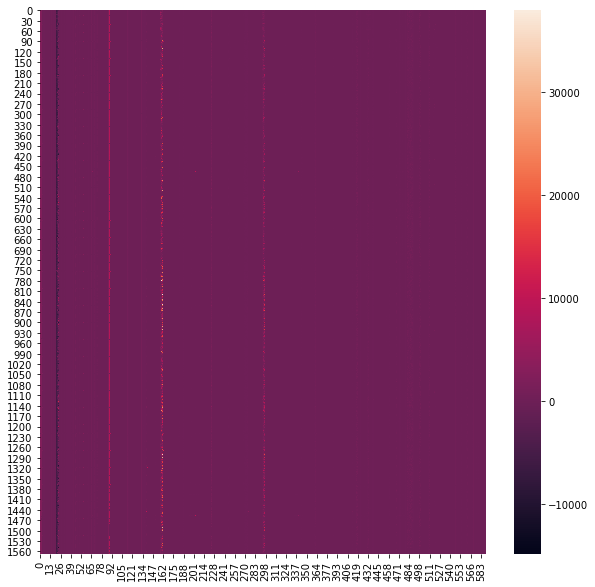

In [90]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
sns.heatmap(X)
 
plt.show()

### 4.2 학습 데이터, 테스트 데이터 분리

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)  #데이터 분리

In [93]:
print("shape of x_train: ", X_train.shape)
print("shape of x_test: ", X_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (1253, 566)
shape of x_test:  (314, 566)
shape of y_train:  (1253,)
shape of y_test:  (314,)


## 5. 스케일링
1. StandardScaler
2. PCA

✔ y 데이터는 스케일링 안함.

### 5.1 StandardScaler
- 표준화를 쉽게 하기 위해 지원하는 클래스
- 평균이 0이고 분산이 1인 값으로 변환

#### 5.1.1 StandardScaler를 적용하기 전 데이터 평균값과 분산값

In [94]:
print('X_train의 평균값 ')
print(X_train.mean())

print('\nX_train의 분산값')
print(X_train.var())

X_train의 평균값 
0      3001.610176
1      2485.622251
2      2184.614983
3      1384.137781
4         3.981853
          ...     
585       3.095474
586       0.021584
587       0.016445
588       0.005276
589      99.382212
Length: 566, dtype: float64

X_train의 분산값
0       41676.326557
1       35959.289718
2       35452.632162
3      203578.933576
4        2954.659983
           ...      
585        15.730415
586         0.000157
587         0.000078
588         0.000008
589      8974.513921
Length: 566, dtype: float64


#### 5.1.2 StandardScaler 적용

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
#StandardScaler 객체 생성
sc = StandardScaler()

#StandScaler로 데이터 세트 변환
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

X_sc = sc.fit_transform(X)

In [97]:
X_sc_pd = pd.DataFrame(X_sc)
X_sc_pd.head()  #표준화된 데이터 확인

,0,1,2,3,4,5,6,7,8,9,...,556,557,558,559,560,561,562,563,564,565
0,0.139998,0.429208,0.032735,0.059342,-0.049911,0.094946,-0.228536,0.239971,0.436850,1.128343,...,-0.229797,-0.135520,0.055275,-0.204269,-0.092516,-0.196519,-1.734706,-1.868461,-1.840769,-1.061159
1,0.464020,-0.105874,0.236852,0.173847,-0.059375,0.094946,0.187826,0.278951,0.393723,0.022511,...,-0.263493,-0.460054,0.162312,0.407145,0.445214,0.385516,-0.958144,0.412587,0.251029,1.156951
2,-0.351256,0.407233,0.026413,0.684661,-0.047236,0.094946,-0.415634,0.232175,-0.192349,0.327111,...,-0.205046,-0.590505,-0.304064,0.022827,0.015030,0.030373,2.989383,3.624211,3.318999,-0.178407
3,-0.070903,-0.025985,0.086766,-1.033387,-0.050620,0.094946,0.354494,0.045074,0.300837,-0.765478,...,-0.224950,-0.645708,-0.059408,-0.291614,-0.361381,-0.282803,-0.100689,-0.177535,-0.306784,-0.274469
4,0.146544,0.098340,0.250931,-0.125070,-0.046823,0.094946,0.016475,0.185400,0.465600,-0.149655,...,-0.230791,-0.454486,-1.512057,26.860983,27.062850,26.907579,-0.100689,-0.177535,-0.306784,-0.274469


In [98]:
#DataFrame 형태로 변경
X_train_sc_pd = pd.DataFrame(X_train_sc)
X_test_sc_pd = pd.DataFrame(X_test_sc)

In [99]:
print('X_train_sc의 평균값 ')
print(X_train_sc_pd.mean())

print('\nX_train_sc의 분산값')
print(X_train_sc_pd.var())

X_train_sc의 평균값 
0     -1.779591e-15
1      4.049576e-16
2     -3.577767e-16
3      5.985281e-17
4      8.262434e-18
           ...     
561    2.986826e-17
562   -2.015768e-16
563    3.195103e-16
564   -1.164272e-16
565   -1.024276e-16
Length: 566, dtype: float64

X_train_sc의 분산값
0      1.000799
1      1.000799
2      1.000799
3      1.000799
4      1.000799
         ...   
561    1.000799
562    1.000799
563    1.000799
564    1.000799
565    1.000799
Length: 566, dtype: float64


✅ StandScaler 적용 후 데이터가 넘파이 형태로 바뀌어서 X_train_sc과 X_test_sc 값이 다르게 나왔었음.   
✅ DataFrame 형태로 바꾸니까 원래와 같은 형태로 출력됨.

### 5.2 PCA(주성분 분석)
- 가장 대표적인 차원 축소 기법
- 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법
- 기존 데이터의 정보 유실이 최소화를 목표로 함
- 가장 높은 분산을 가진 데이터 축이 PCA의 주성분

In [100]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
pca = PCA(n_components=0.85)
X_sc_pca = pca.fit_transform(X_sc)

X_sc_pca_pd = pd.DataFrame(data = X_sc_pca)

In [102]:
print('Variance of each component:', pca.explained_variance_ratio_)
print('\nTotal features:', pca.n_components_)
print('Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.05709479 0.03789838 0.02926733 0.026212   0.0233862  0.02204847
 0.01901021 0.0180492  0.01772505 0.01610313 0.01516086 0.01469317
 0.01441183 0.01372107 0.01361552 0.01341125 0.01299468 0.01256908
 0.01218771 0.01167496 0.0113639  0.01113073 0.01086963 0.01057798
 0.01016699 0.01001149 0.00994223 0.00970551 0.00935605 0.0089403
 0.00874376 0.00862317 0.00825497 0.00808178 0.00793076 0.00782306
 0.00769352 0.00753651 0.00746202 0.00728226 0.00720195 0.00708609
 0.00686254 0.00671258 0.00663692 0.00662037 0.00655481 0.00648975
 0.00625613 0.00607661 0.00598806 0.00594888 0.0058418  0.00576625
 0.00565627 0.00546543 0.0053996  0.00538472 0.00528264 0.00521017
 0.00510636 0.0050399  0.00500063 0.00499131 0.00481333 0.00475621
 0.0046536  0.00465065 0.00451614 0.00449709 0.00434361 0.00431796
 0.00421254 0.00415984 0.00410826 0.00407413 0.00385752 0.00382976
 0.00373831 0.00357884 0.00354508 0.003491   0.00340439 0.00335632
 0.00329752 0.00320668 0.00311863 0

In [103]:
X_train_sc_pca = pca.transform(X_train_sc)
X_test_sc_pca = pca.transform(X_test_sc)

In [104]:
X_sc_pca_pd

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
0,-1.480892,3.443087,4.556093,-2.232184,0.885531,-1.750156,1.411821,2.036742,0.768743,-0.998271,...,-1.978389,-1.640996,-0.631491,-0.069233,0.430680,0.122708,-0.782225,-2.126332,0.699609,0.674416
1,-1.989067,1.429700,3.487361,-1.856899,1.680818,-2.511428,0.874279,3.376972,-0.995468,-0.482618,...,-0.968337,-0.464505,1.746610,-0.112332,0.651566,1.513998,1.104444,0.510013,0.187142,0.617557
2,0.264950,0.942759,0.643228,-0.361364,-0.015905,0.323023,-0.804382,2.185448,-0.887683,1.684722,...,0.868783,3.323481,-0.823437,-0.373998,-1.230204,4.274918,-0.787184,-0.104358,1.879640,0.984710
3,0.423280,1.710080,-2.255846,5.844296,-0.866750,0.289288,-0.026192,25.742741,18.438800,16.554750,...,1.631955,-0.601355,0.502127,-3.025899,3.316678,-4.649706,-0.980783,-3.603541,1.912542,-0.821435
4,0.302437,3.314989,3.017150,-0.204792,0.107710,0.579850,-0.736321,2.274743,5.860552,1.713185,...,1.510240,-0.489043,1.842977,-2.015589,1.419746,-1.405011,-1.480750,3.123900,2.284525,-0.352683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,-1.279091,-4.394633,-3.994319,4.977084,1.495699,0.472086,-1.972459,0.375644,1.462248,-2.144301,...,1.412541,-0.648601,0.436758,0.667039,0.198648,-0.219622,-0.434466,-0.248356,1.567079,1.024875
1563,-0.381968,0.069666,1.243167,0.564084,1.101920,-1.235559,0.295034,4.483768,-1.984628,-2.560960,...,-1.186694,-2.281451,0.573762,0.045348,-0.410490,-1.237799,-0.145078,-1.167611,-0.961543,0.742751
1564,-1.135744,-0.977762,-17.543619,-5.067267,55.976869,-2.741146,-0.260357,-2.810107,2.951807,-2.642046,...,-0.955336,0.914713,1.102924,0.121679,1.278490,-0.755959,-0.445384,-0.036693,-1.553303,-0.452818
1565,-1.145397,-4.149672,-3.887361,1.943701,1.282016,0.101448,-2.176326,-0.293376,1.848950,-5.863599,...,2.488764,1.264039,-2.167528,0.789507,0.972609,0.290541,-1.006687,0.713894,0.182323,-0.166799


In [105]:
X_sc_pca_pd.describe()

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
count,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,...,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03
mean,1.147774e-17,-3.592106e-16,6.416196e-16,-5.441297e-16,8.615387e-17,-6.574901e-17,-3.740892e-17,2.692309e-16,-2.040486e-16,3.831580e-16,...,-2.897774e-17,4.534414e-17,-2.189272e-17,-3.769232e-17,-1.101721e-16,6.309213e-17,2.125507e-18,4.746965e-17,7.325913e-17,-1.714575e-17
std,5.092896e+00,4.149319e+00,3.646348e+00,3.450775e+00,3.259465e+00,3.164870e+00,2.938732e+00,2.863489e+00,2.837659e+00,2.704716e+00,...,1.171237e+00,1.170212e+00,1.145915e+00,1.137810e+00,1.127782e+00,1.124712e+00,1.106876e+00,1.102975e+00,1.088925e+00,1.086226e+00
min,-9.304416e+00,-9.054036e+00,-1.784680e+01,-1.083546e+01,-5.662818e+00,-2.030334e+01,-4.615106e+01,-2.151964e+01,-1.678170e+01,-1.130524e+01,...,-4.286098e+00,-4.746583e+00,-4.464508e+00,-6.045724e+00,-5.583018e+00,-4.649706e+00,-4.139484e+00,-3.733346e+00,-4.036008e+00,-3.622699e+00
25%,-1.097530e+00,-2.254008e+00,-1.898392e+00,-1.692172e+00,-7.693717e-01,-1.356117e+00,-8.069957e-01,-1.417572e+00,-1.857939e+00,-1.644506e+00,...,-7.566617e-01,-7.066462e-01,-7.587375e-01,-7.151263e-01,-6.491579e-01,-7.206260e-01,-7.456147e-01,-6.813539e-01,-6.765627e-01,-7.122765e-01
50%,-4.201242e-01,-6.689511e-01,-1.544717e-01,-6.078513e-02,-1.953381e-01,-2.582915e-01,-1.555921e-02,2.922021e-01,-2.145469e-02,-9.130660e-02,...,-5.034191e-03,-2.003333e-02,-1.955805e-03,1.754763e-02,1.303057e-02,1.436333e-02,2.155433e-02,7.630727e-03,3.291650e-03,1.557076e-02
75%,3.983487e-01,1.343064e+00,2.053309e+00,1.525247e+00,3.389696e-01,1.118596e+00,8.192830e-01,1.806190e+00,1.678170e+00,1.544008e+00,...,8.070431e-01,7.130696e-01,7.079437e-01,7.035629e-01,6.435116e-01,7.161274e-01,7.364748e-01,6.794236e-01,6.356659e-01,7.114206e-01
max,1.054699e+02,3.205599e+01,8.159886e+01,1.039124e+02,5.617039e+01,9.448666e+01,8.583749e+01,2.574274e+01,2.533041e+01,2.964458e+01,...,5.400102e+00,6.136647e+00,6.545766e+00,1.016980e+01,6.694362e+00,4.876860e+00,4.465981e+00,5.809036e+00,7.183777e+00,5.858476e+00


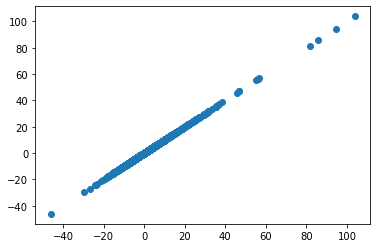

In [106]:
plt.scatter(X_sc_pca[:,1:-1], X_sc_pca[:,1:-1])

✅ Scatter plot(산점도) 그리기  
✅ 산점도 : 두 연속형 변수의 상관관계를 나타낼 수 있는 유용한 시각화 도구  
✅ x축과 y축의 데이터로 인식 / 순서쌍이 만들어지게 되어 해당 좌표에 마커(Marker) 출력

## 6. 로지스틱 회귀 모델 수행

### 6.1 교차검증 후 로지스틱 회귀 모델 적용
1. cross_val_score() 이용
2. cross_validate() 이용

In [107]:
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, roc_auc_score, precision_score, recall_score

#### 6.1.1 cross_val_score()

In [108]:
classifier = LogisticRegression(random_state=10)

score = cross_val_score(classifier, X_train_sc_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')

In [109]:
print('교차 검증별 정확도 : ', np.round(score,4))
print('평균 검증 정확도 : ', np.round(np.mean(score),4))

교차 검증별 정확도 :  [0.873  0.9206 0.9206 0.92   0.888  0.936  0.92   0.912  0.904  0.912 ]
평균 검증 정확도 :  0.9106


#### cross_val_score(estimator, X, y=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')  
✅ estimator : 사이킷런의 분류 알고리즘 클래스인 Classifier 또는 회귀 알고리즘 클래스인 Regressor를 의미  
✅ X : 피처 데이터 세트  
✅ y : 레이블 데이터 세트  
✅ scoring : 예측 성능 평가 지표  
✅ cv : 교차 검증 폴드 수

#### 6.1.2 cross_validate()

In [110]:
classifier = LogisticRegression(random_state=10)

cross_validate(classifier, X_train_sc_pca, y_train, cv=10, n_jobs=-1, scoring=['accuracy','roc_auc', 'recall','precision'])

{'fit_time': array([0.13143229, 0.15469623, 0.18226576, 0.1290946 , 0.16632414,
        0.14138484, 0.14536095, 0.12497783, 0.07983184, 0.06420994]),
 'score_time': array([0.        , 0.        , 0.00871754, 0.0156219 , 0.00970244,
        0.        , 0.01172066, 0.0246594 , 0.00199485, 0.00299239]),
 'test_accuracy': array([0.87301587, 0.92063492, 0.92063492, 0.92      , 0.888     ,
        0.936     , 0.92      , 0.912     , 0.904     , 0.912     ]),
 'test_roc_auc': array([0.62393162, 0.64387464, 0.61253561, 0.86217949, 0.5982906 ,
        0.59935897, 0.34615385, 0.73183761, 0.37820513, 0.64102564]),
 'test_recall': array([0.   , 0.   , 0.   , 0.125, 0.   , 0.25 , 0.   , 0.125, 0.   ,
        0.125]),
 'test_precision': array([0.  , 0.  , 0.  , 0.25, 0.  , 0.5 , 0.  , 0.2 , 0.  , 0.2 ])}

#### cross_validate() : 다중 평가 지표
✅ 하나의 평가 지표만 담을 수 있는 cross_val_score과는 달리 여러개의 평가 지표를 활용할 수 있음.

### 6.2 로지스틱 모델 수행(교차검증x)

In [111]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train_sc_pca, y_train)
lr_preds = lr_clf.predict(X_test_sc_pca)

In [112]:
print('accuracy : {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc : {:0.3f}'.format(roc_auc_score(y_test, lr_preds)))
print('precision : {:0.3f}'.format(precision_score(y_test, lr_preds)))
print('recall : {:0.3f}'.format(recall_score(y_test, lr_preds)))

accuracy : 0.927
roc_auc : 0.541
precision : 0.333
recall : 0.095


✅ 정확도는 높으나 재현율은 너무 낮고 정밀도와 roc_auc도 낮은 편. 개선이 필요함.

### 6.3 GridSearchCV 적용 후 로지스틱 회귀 모델 수행

In [113]:
from sklearn.model_selection import GridSearchCV

In [114]:
params = {'penalty':['l2','l1'], 'C':[0.01,0.1,1,1,5,10]}

In [115]:
grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=10)
grid_clf.fit(X_train_sc_pca, y_train)

print('최적의 하이퍼 파라미터:{0}, 최적의 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적의 하이퍼 파라미터:{'C': 0.01, 'penalty': 'l2'}, 최적의 평균 정확도:0.927


✅ GridSearchCV를 이용하여 최적의 하이퍼 파라미터와 최적의 평균 정확도 계산

### 6.4 plot_result 함수 정의 후 로지스틱 회귀 모델 적용

In [116]:
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix

In [117]:
cv_acc = {}  #cross validation accuracy

cv_TPR = {}  #cross validation true positive rate   --- TP / (FN + TP)

cv_FPR = {}  #cross validation false positive rate  --- FP / (FP + TN)

In [120]:
def plot_result(model, name:str):
    
    model.fit(X_train_sc_pca, y_train)
    y_pred = model.predict(X_test_sc_pca)

    scoring = ['balanced_accuracy', 'recall_macro']
    scores = cross_val_score(model, X_test_sc_pca, y_test, cv=10, scoring = 'balanced_accuracy')  #교차검증
    
    cv_acc[name] = round(scores.mean(), 4)*100 
    cv_TPR[name] = (confusion_matrix(y_test, y_pred)[1][1]/confusion_matrix(y_test, y_pred)[1].sum())*100  
    cv_FPR[name] = (confusion_matrix(y_test, y_pred)[0][1]/confusion_matrix(y_test, y_pred)[0].sum())*100 
    
    print('Average Balanced Accuracy (CV=10):', scores.mean())

    print(classification_report(y_test, y_pred, zero_division=0))

    plot_confusion_matrix(model, X_test_sc_pca, y_test)
    plt.show()

Average Balanced Accuracy (CV=10): 0.4625287356321839
              precision    recall  f1-score   support

          -1       0.94      0.99      0.96       293
           1       0.33      0.10      0.15        21

    accuracy                           0.93       314
   macro avg       0.64      0.54      0.55       314
weighted avg       0.90      0.93      0.91       314



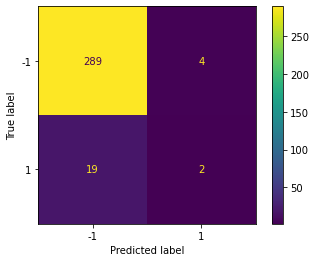

In [121]:
plot_result(classifier, "lr")

✅ Balanced accuracy(균형 정확도) : 각 클래스 재현율의 산술 평균  
✅ 목표: 1에 가까울수록 좋음  
✅ 범위: [0, 1]